<a href="https://colab.research.google.com/github/ballysingh11/pyweather/blob/master/Aerial_Cactus_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2, os
import matplotlib.pyplot as plt

In [ ]:
import kaggle

OSError: ignored

In [ ]:
!mv kaggle.json /root/.kaggle

In [ ]:
import kaggle

In [ ]:
!kaggle competitions download -c aerial-cactus-identification

 92% 11.0M/12.0M [00:01<00:00, 12.9MB/s]
100% 12.0M/12.0M [00:01<00:00, 7.25MB/s]


In [ ]:
! unzip -q aerial-cactus-identification.zip

In [ ]:
! unzip -q train.zip

In [ ]:
!rm -rvf test.zip sample_submission.csv

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head(5)

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [ ]:
data.shape

(17500, 2)

In [ ]:
count = data['has_cactus'].value_counts()

<Axes: xlabel='has_cactus', ylabel='count'>

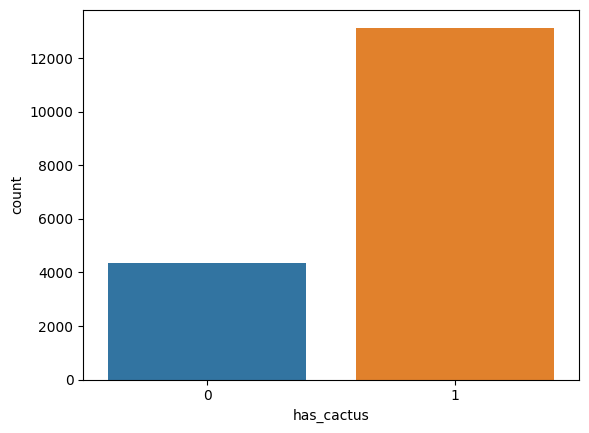

In [ ]:
import seaborn as sns
sns.countplot(data, x = 'has_cactus')

In [ ]:
len(os.listdir("train/"))

17500

In [ ]:
os.listdir("train/")[2]

'366a6072020b50718cac0f24f3cdff32.jpg'

In [ ]:
image = cv2.imread("train/7b67ec1d0b256d560aeda19636006e28.jpg")


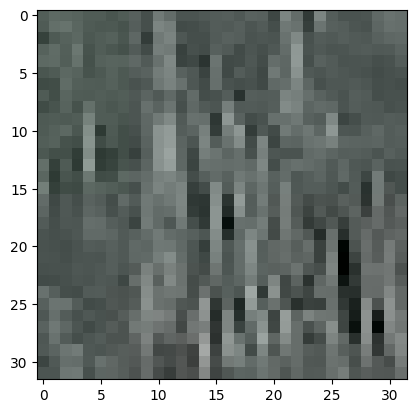

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
image.shape

(32, 32, 3)

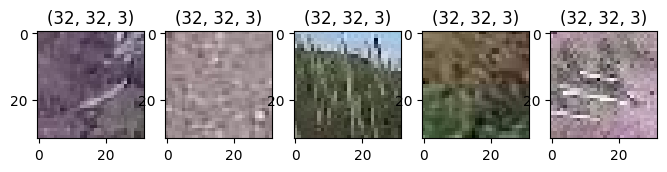

In [ ]:
plt.figure(figsize =(8,12))
for i in range (1,6):
  plt.subplot(1,5,i)
  image = 'train/' + np.random.choice(os.listdir('train'))
  image = cv2.imread(image)
  plt.title(image.shape)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.imshow(image)

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                                                      validation_split=0.1)

In [ ]:
target_size = (32,32)
batch_size = 32

In [ ]:
for i in range(data.shape[0]):
  if data.iloc[i,-1] == 1:
    data.iloc[i,-1] == "yes"
  else:
    data.iloc[i,-1] == "no"

In [ ]:
data['has_cactus'] = data['has_cactus'].astype(str)

In [ ]:
train_idg=idg.flow_from_dataframe(data,'train/',x_col='id',y_col='has_cactus',target_size=target_size,batch_size=batch_size,
                                  subset='training')

Found 15750 validated image filenames belonging to 2 classes.


In [ ]:
val_idg=idg.flow_from_dataframe(data,'train/',x_col='id',y_col='has_cactus',target_size=target_size,batch_size=batch_size,
                                  subset='validation')

Found 1750 validated image filenames belonging to 2 classes.


In [ ]:
vgg16 = tf.keras.applications.VGG16(include_top = False, input_shape = (32,32,3))
vgg16.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
flat = tf.keras.layers.Flatten(name = 'flatten') (vgg16.output)
drop = tf.keras.layers.Dropout(0.3,name = 'dropout') (flat)
dense1 = tf.keras.layers.Dense(512, tf.keras.activations.relu,name = 'dense_1') (drop)
dense2 =  tf.keras.layers.Dense(256, tf.keras.activations.relu,name = 'dense_2') (dense1)
output = tf.keras.layers.Dense(2, tf.keras.activations.softmax,name = 'output_layer')(dense2)
model = tf.keras.models.Model(inputs = [vgg16.input], outputs = output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.categorical_crossentropy,
              metrics=['acc'])

In [ ]:
model.fit(train_idg, batch_size = batch_size, validation_data=val_idg, epochs = 10)

Epoch 1/10
493/493 [==============================] - 19s 20ms/step - loss: 0.3689 - acc: 0.9250 - val_loss: 0.1269 - val_acc: 0.9480
Epoch 2/10
493/493 [==============================] - 9s 19ms/step - loss: 0.1314 - acc: 0.9488 - val_loss: 0.0866 - val_acc: 0.9634
Epoch 3/10
493/493 [==============================] - 9s 19ms/step - loss: 0.1067 - acc: 0.9589 - val_loss: 0.0818 - val_acc: 0.9703
Epoch 4/10
493/493 [==============================] - 10s 20ms/step - loss: 0.1036 - acc: 0.9595 - val_loss: 0.0802 - val_acc: 0.9703
Epoch 5/10
493/493 [==============================] - 9s 18ms/step - loss: 0.0903 - acc: 0.9643 - val_loss: 0.0670 - val_acc: 0.9731
Epoch 6/10
493/493 [==============================] - 9s 18ms/step - loss: 0.0891 - acc: 0.9660 - val_loss: 0.0803 - val_acc: 0.9714
Epoch 7/10
493/493 [==============================] - 9s 19ms/step - loss: 0.0831 - acc: 0.9679 - val_loss: 0.0690 - val_acc: 0.9731
Epoch 8/10
493/493 [==============================] - 9s 19ms/step 

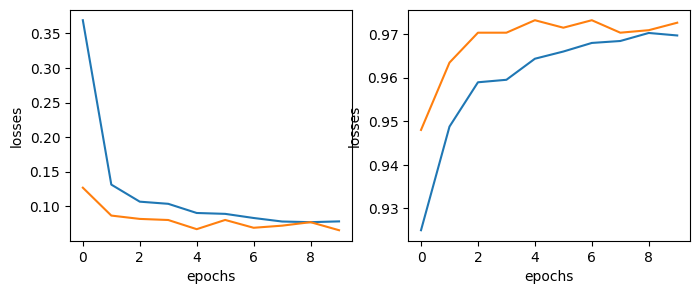

In [ ]:
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.plot(model.history.history['loss'], label = 'loss')
plt.plot(model.history.history['val_loss'], label = 'validation_loss')
plt.xlabel('epochs')
plt.ylabel('losses')

plt.subplot(122)
plt.plot(model.history.history['acc'], label = 'acc')
plt.plot(model.history.history['val_acc'], label = 'validation_acc')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.show()